<h2 align=center> Project - Ensemble Techniques</h2>

<h1><u>Data Description:</u></h1><br>
The data is related with direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to
the same client was required, in order to access if the product (bank term deposit) would
be ('yes') or not ('no') subscribed.

<h1><u>Domain:</u></h1><br>
Banking

<h1><u>Context:</u></h1><br>

Leveraging customer information is paramount for most businesses. In the case of a bank,
attributes of customers like the ones mentioned below can be crucial in strategizing a
marketing campaign when launching a new product.

<h1><u>Attribute Information:</u></h1><br>

1. **age** : (numeric)
2. **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital** : marital status (categorical: 'divorced','married','single','unknown';
note: 'divorced' means divorced or widowed)
4. **education** : (categorical
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','univers
ity.degree','unknown')
5. **default** : has credit in default? (categorical: 'no','yes','unknown')
6. **balance** : average yearly balance, in euros (numeric)
7. **housing** : has housing loan? (categorical: 'no','yes','unknown')
8. **loan** : has personal loan? (categorical: 'no','yes','unknown')
9. **contact** : contact communication type (categorical: 'cellular','telephone')
10. **day** : last contact day of the month (numeric 1 -31)
11. **month** : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. **duration** : last contact duration, in seconds (numeric). Important note: this
attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet,
the duration is not known before a call is performed. Also, after the end of the
call y is obviously known. Thus, this input should only be included for benchmark
purposes and should be discarded if the intention is to have a realistic predictive
model.
13. **campaign** : number of contacts performed during this campaign and for this
client (numeric, includes last contact)
14. **pdays** : number of days that passed by after the client was last contacted from a
previous campaign (numeric; 999 means client was not previously contacted)
15. **previous** : number of contacts performed before this campaign and for this client
(numeric)
16. **poutcome**: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')
17. **target** : has the client subscribed a term deposit? (binary: "yes","no")

<h1><u>Learning Outcomes:</u></h1><br>
<ul>
<li>Exploratory Data Analysis</li>
<li>Preparing the data to train a model</li>
<li>Training and making predictions using an Ensemble Model</li>
<li>Tuning an Ensemble model</li>
</ul>

<h1><u>Objective:</u></h1><br>
The classification goal is to predict if the client will subscribe (yes/no) a term deposit
(variable y).

<h1><u>Steps and tasks:</u></h1><br>
<ul>
<li>1. Import the necessary libraries (2.5 marks)</li>
<li>2. Read the data as a data frame (2.5 marks)</li>
<li>3. Perform basic EDA which should include the following and print out your insights
at every step. (15 marks)</li>
    <ul>
<li>a. Shape of the data (2 marks)</li>
<li>b. Data type of each attribute (2 marks)</li>
<li>c. Checking the presence of missing values (4 marks)</li>
<li>d. 5 Point summary of numerical attributes (3 marks)</li>
<li>e. Checking the presence of outliers (4 marks)</li>
    </ul>
<li>4. Prepare the data to train a model â€“ check if data types are appropriate, get rid of
the missing values etc. (15 marks)</li>
<li>5. Train a few standard classification algorithms, note and comment on their
performances across different classification metrics. (15 marks)</li>
<li>6. Build the ensemble models and compare the results with the base models. Note:
Random forest can be used only with Decision trees. (15 marks)</li>
<li>7. Compare performances of all the models (5 marks)</li>
</ul>

In [516]:
# Outlier Treatment function
def outliers_transform(base_dataset):
    for i in base_dataset.var().sort_values(ascending=False).index[0:15]:
        x=np.array(base_dataset[i])
        qr1=np.quantile(x,0.25)
        qr3=np.quantile(x,0.75)
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        for p in x:
            if p <ltv:
                y.append(ltv)
            elif p>utv:
                y.append(utv)
            else:
                y.append(p)
        base_dataset[i]=y

#outliers_transform(df)

### Importing Important Libraries

#### 1. Import the necessary libraries (2.5 marks)

In [739]:
import warnings

import os

#Panda library for importing DataFrame
import pandas as pd

import numpy as np

#Visulization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#importing Machine Learning parameters and classifiers 
import scipy.stats as stats
from scipy.stats import zscore

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score,f1_score, auc

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Ensemble classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

### Loading Data in DataFrame

#### 2. Read the data as a data frame (2.5 marks)

In [786]:
os.chdir("/home/ratnesh/Downloads/")

In [787]:
df=pd.read_csv("bank-full.csv")
bank_data=df.copy()

### Understanding Data

In [788]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

### Observation :
The following columns are binary category columns
1. default - has credit in default?
2. housing - has housing loan? 

The following columns are ordinal categorical Variables:
1. job -  type of job
2. marital - marital status ('divorced','married','single')
3. education - education level 

The following variables for nominal variables
1. contact - contact number

The following varibales are interval variables
1. age - Customer's age in completed years


## Exploratory Data Analysis (EDA)

3. Perform basic EDA which should include the following and print out your insights at every step. (15 marks) <br>
a. Shape of the data  (2 marks)

In [789]:
df.shape

(45211, 17)

In [790]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

#### b. Data type of each attribute (2 marks)

In [791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [792]:
#Get the Data Types of attributes
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

#### c. Checking the presence of missing values (4 marks)

In [793]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Observatio :<br>
    As per above output there are no missing values and attributes have unknown values

#### Checking for unknown values present in attributes

In [794]:
cols=[col for col in df.columns]

col_with_unkown=[]

for col in cols:
    if 'unknown' in df[col].values:
        col_with_unkown.append(col)
        
print("Columns have unkown values in it",col_with_unkown) 

Columns have unkown values in it ['job', 'education', 'contact', 'poutcome']


/home/ratnesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


Observation: <br>
    Following columns have unknown value
    1. job   
    2. education    
    3. contact   
    4. poutcome

#### Checkinh howmany unknown values exists in attributes

In [795]:
print("Unknown values count : \n")
for col in col_with_unkown:
    print(col," : ",df[df[col].str.contains('unknown')][col].count())

Unknown values count : 

job  :  288
education  :  1857
contact  :  13020
poutcome  :  36959


#### Checking other values in attributes where unknown value is present

In [796]:
print("Other values count in attributes having unknown values -\n")
for col in col_with_unkown:
    print("===",col,"===")
    print(df.groupby(df[col])[col].count(),"\n")

Other values count in attributes having unknown values -

=== job ===
job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64 

=== education ===
education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64 

=== contact ===
contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 

=== poutcome ===
poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



### Check Unique values of all the column

In [797]:
for i in df.columns:
  print(i," :-")
  print(df[i].unique())
  print('==='*25)

age  :-
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job  :-
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital  :-
['married' 'single' 'divorced']
education  :-
['tertiary' 'secondary' 'unknown' 'primary']
default  :-
['no' 'yes']
balance  :-
[ 2143    29     2 ...  8205 14204 16353]
housing  :-
['yes' 'no']
loan  :-
['no' 'yes']
contact  :-
['unknown' 'cellular' 'telephone']
day  :-
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month  :-
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration  :-
[ 261  151   76 ... 1298 1246 1556]
campaign  :-
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21

#### Distinct Values count in each attributes

In [798]:
df.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

#### d. 5 Point summary of numerical attributes (3 marks)

In [799]:
#df.describe()
#df.describe().transpose()
df.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

Observation: <br>
1. age is equally distributed as mean and 50% values have no major difference
2. balance is skewed and mean and 50% values have major difference
3. balance has negative(-) values as well
4. day has equally distributed
5. duration is skewed as mean and 50% values have major difference
6. pdays have negative(-) values in it


### List of numeric columns

In [800]:
### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [801]:
df[numerical_cols].head()

age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0

### List of Categorical columns

In [802]:
### categorical
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target']

In [803]:
target='Target'
non_features=[target]
cat_features=[col for col in df.select_dtypes('object').columns if col not in non_features]
num_features=[col for col in df.select_dtypes(np.number).columns if col not in non_features]

print("Categorical Features :\n",cat_features,"\n")
print("Numerical Features :\n",num_features)

Categorical Features :
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 

Numerical Features :
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


### Summary of Categorical attributes

In [804]:
df[cat_features].describe()

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome  
count   45211    45211  
unique     12        4  
top       may  unknown  
freq    13766    36959

/home/ratnesh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


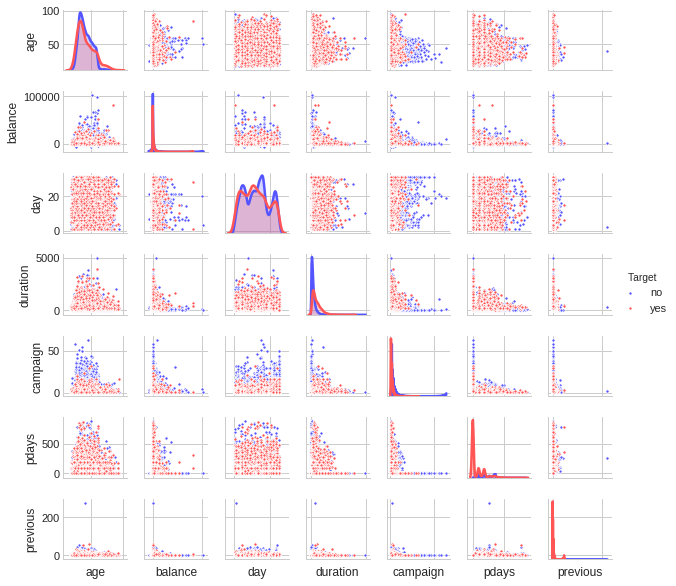

In [805]:
#sns.pairplot(df)
#plt.show()

g = sns.pairplot(df, hue='Target', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])
plt.show()

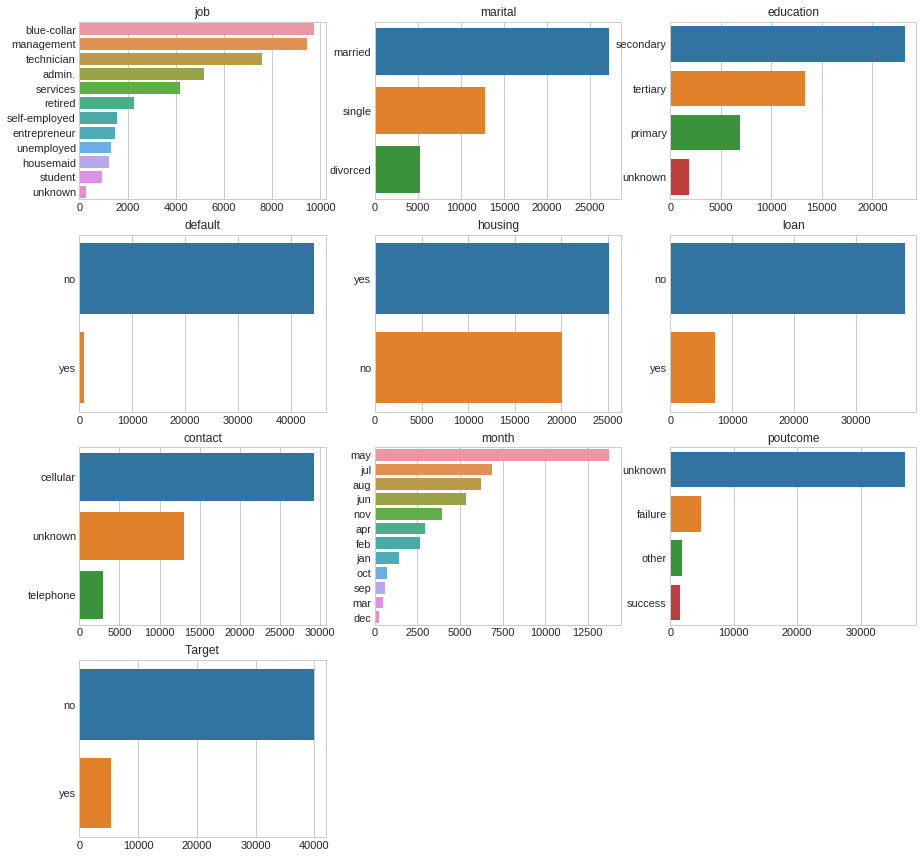

In [806]:
plt.figure(figsize=(15,15))
for i,col in enumerate(category_cols,start=1):
    plt.subplot(4,3,i);
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)

### Observation : <br>
     Most of the attributes having skewed data


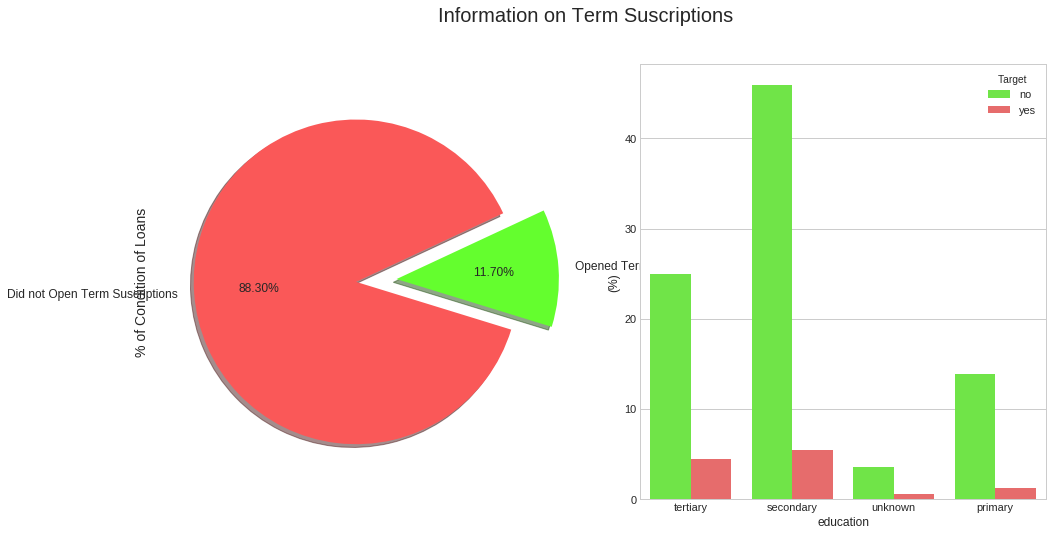

In [807]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["Target"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="Target", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

### Observation:<br>
    Client having Secondary and Tertiary education subscribed more Term Deposite than Primary and Unknown<br>
    Only 11% client subscribed for Term Deposite 

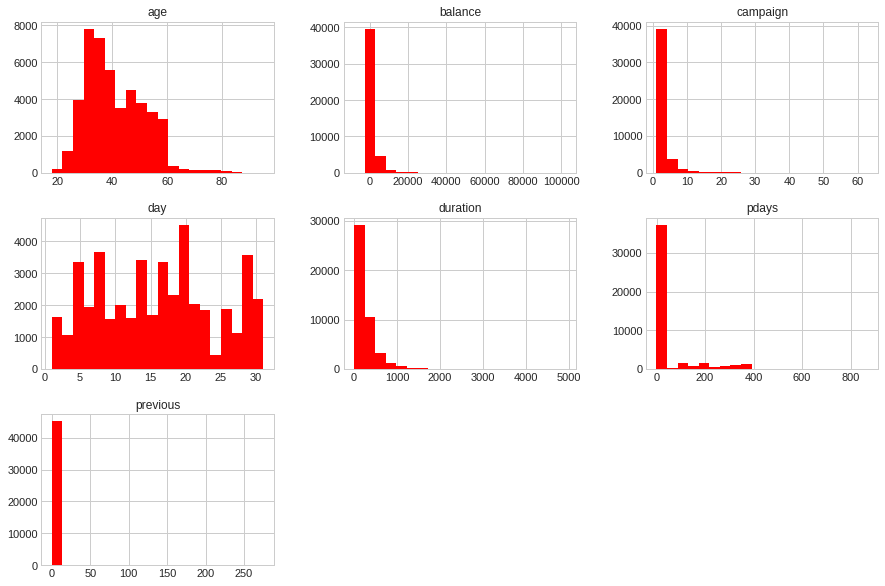

In [808]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(15,10), color='red')
plt.show()

#### Target column distribution

In [809]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

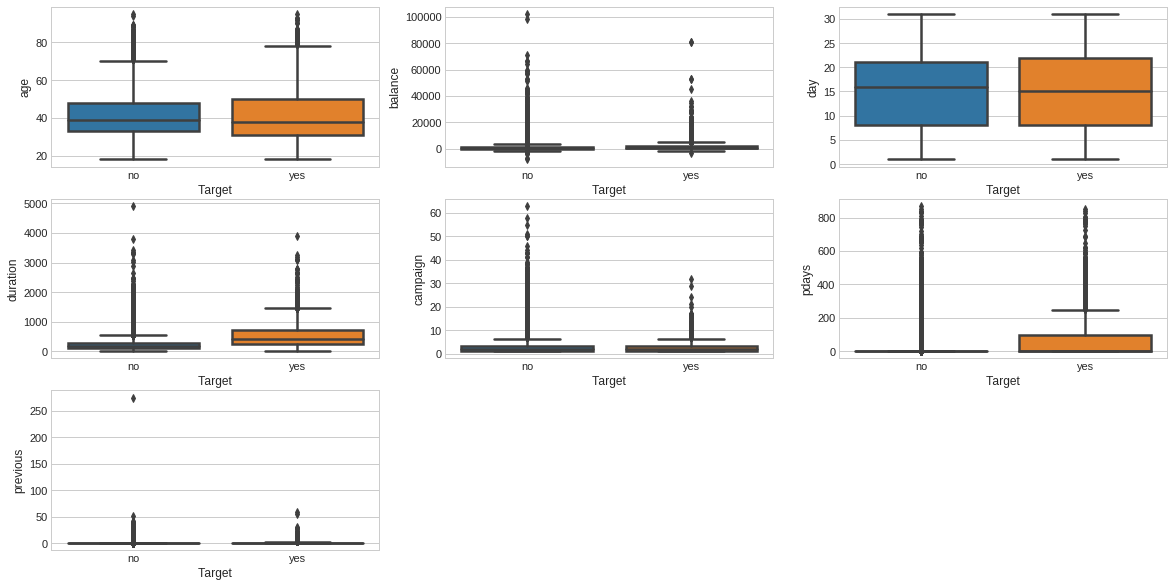

In [810]:
plt.figure(figsize=(20,10))
for i,col in enumerate(num_features,start=1):
    plt.subplot(3,3,i);
    sns.boxplot(y=df[col],x=df[target]);
plt.show()

### Missing/Unknown values Treatment

In [811]:
#df.education.replace('unknown',df.education.mode()[0],inplace=True)

df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'

df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'tertiary'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'secondary'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'primary'

df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'



In [812]:
df['job'] = df.job.replace('unknown',df.job.mode()[0])

In [813]:
df['education'] = df.education.replace('unknown',df.education.mode()[0])

In [814]:
print("Other values count in attributes having unknown values -\n")
for col in col_with_unkown:
    print("===",col,"===")
    print(df.groupby(df[col])[col].count(),"\n")

Other values count in attributes having unknown values -

=== job ===
job
admin.           5171
blue-collar      9998
entrepreneur     1487
housemaid        1240
management       9458
retired          2286
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
Name: job, dtype: int64 

=== education ===
education
primary       6896
secondary    24772
tertiary     13543
Name: education, dtype: int64 

=== contact ===
contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64 

=== poutcome ===
poutcome
failure     4901
other       1840
success     1511
unknown    36959
Name: poutcome, dtype: int64 



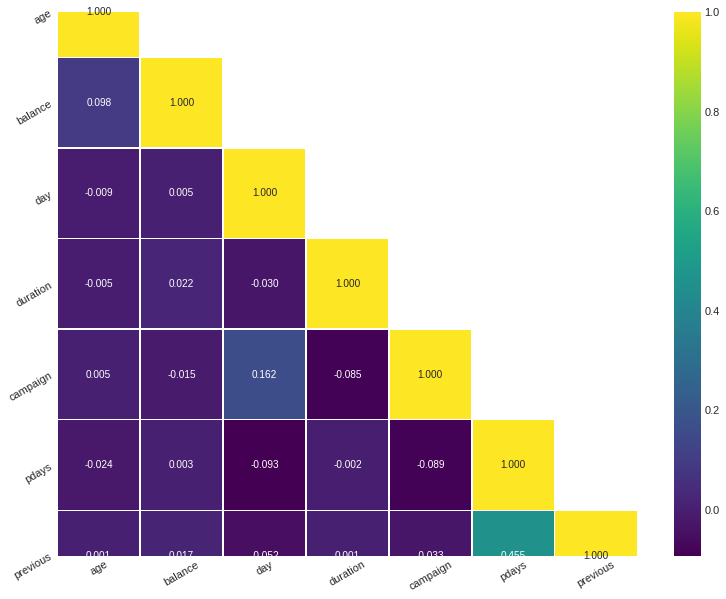

In [815]:
fig, ax = plt.subplots(figsize=(13,10))

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask, 1)] = True

sns.heatmap(df.corr(), annot=True,mask=mask, cmap='viridis',linewidths=0.5,ax=ax, fmt='.3f')

rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
roty = ax.set_yticklabels(ax.get_yticklabels(), rotation=30)

#### e. Checking the presence of outliers (4 marks)

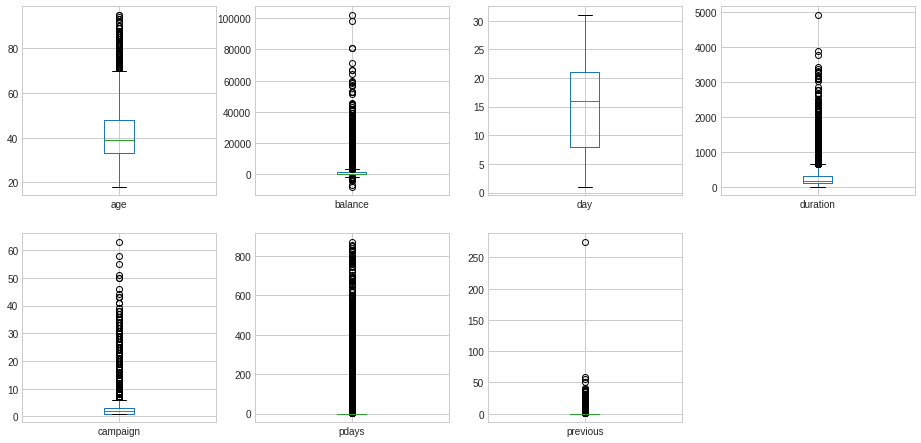

In [816]:
df[num_features].plot(kind='box',subplots=True, layout=(4,4), fontsize=10, figsize=(16,16));

Observation :<br>
Age, Balance, duration, Compaign, pdays and previous attributes have ouliers.<br>
day attribute has balance data

## Outlier Treatment

In [817]:

withOutliers = ['age', 'balance', 'duration', 'campaign','pdays','previous']

IQR=df[withOutliers].describe().T['75%']-df[withOutliers].describe().T['25%']

LW,UW = df[withOutliers].describe().T['25%']-(IQR*1.5),df[withOutliers].describe().T['75%']+(IQR*1.5)


for i in withOutliers:
    df[i][df[i]>UW[i]]=UW[i];
    df[i][df[i]<LW[i]]=LW[i]
    


/home/ratnesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ratnesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ratnesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__m

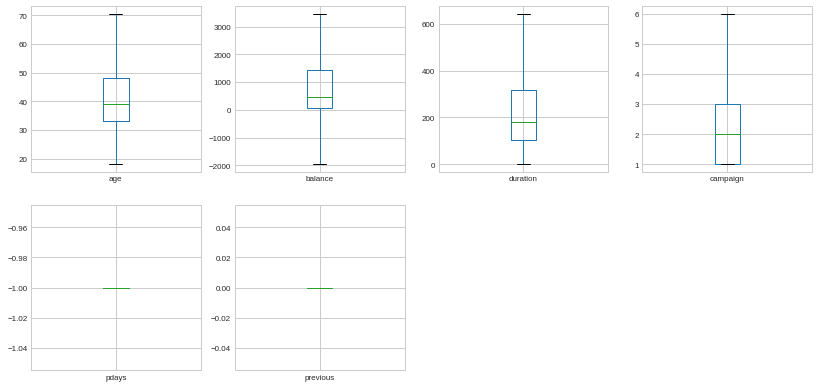

In [818]:
#df[num_features].plot(kind='box',subplots=True, layout=(4,4), fontsize=10, figsize=(16,16));
df[withOutliers].plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(14,14));

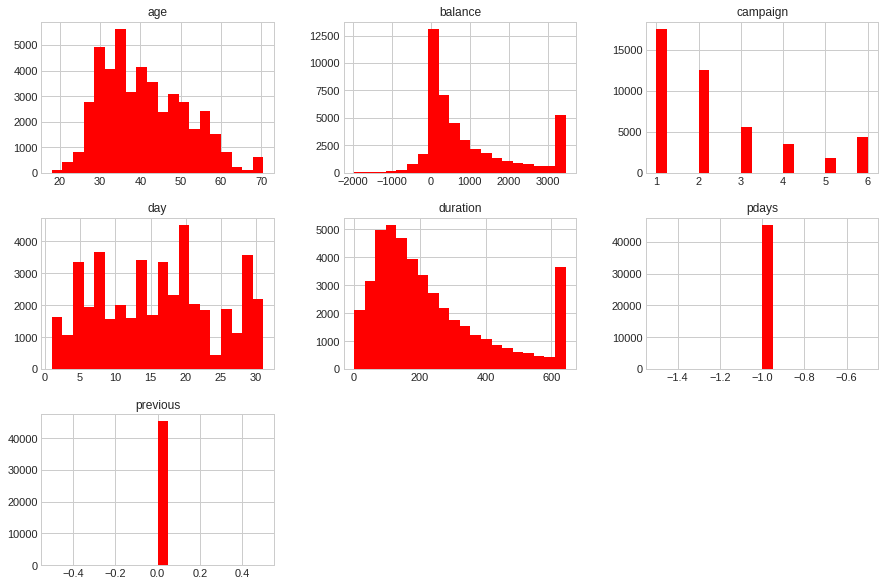

In [819]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(15,10), color='red')
plt.show()    

In [820]:
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

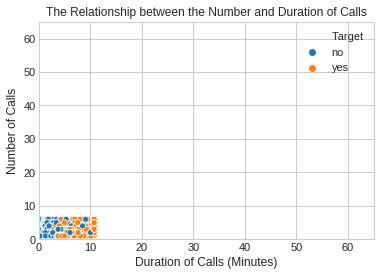

In [821]:
duration_campaign = sns.scatterplot(x='duration', y='campaign',data = df,
                     hue = 'Target')

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')
# Annotation
plt.show()

In [822]:
print('Rows count having call duration less than 10 Sec -\t',df[df.duration < 10/60]['duration'].count())

Rows count having call duration less than 10 Sec -	 342


In [823]:
# drop rows where call duration was less than 10 seconds
#dropped 342 rows
df = df.drop(df[df.duration < 10/60].index, axis = 0, inplace = False)

In [824]:
#putting age into bins
df.loc[df["age"] < 30,  'age'] = 20
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age'] = 30
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age'] = 40
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age'] = 50
df.loc[df["age"] >= 60, 'age'] = 60

In [825]:
labelenc = LabelEncoder()
df[category_cols] = df[category_cols].apply(LabelEncoder().fit_transform)
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0  50.0    4        1          2        0     2143        1     0        2   
1  40.0    9        2          1        0       29        1     0        2   
2  30.0    2        1          1        0        2        1     1        2   
3  40.0    1        1          1        0     1506        1     0        2   
4  30.0    1        2          1        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  
0    5      8      4.35         1     -1         0         3       0  
1    5      8      2.52         1     -1         0         3       0  
2    5      8      1.27         1     -1         0         3       0  
3    5      8      1.53         1     -1         0         3       0  
4    5      8      3.30         1     -1         0         3       0

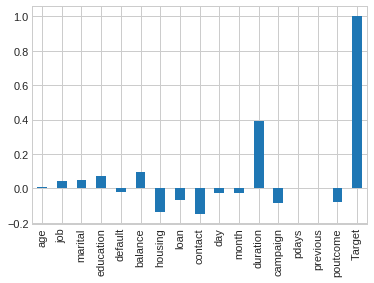

In [826]:
df.corr()['Target'][:].plot.bar()

Target Attribute distribution 

0    2009
1    1849
Name: Target, dtype: int64 



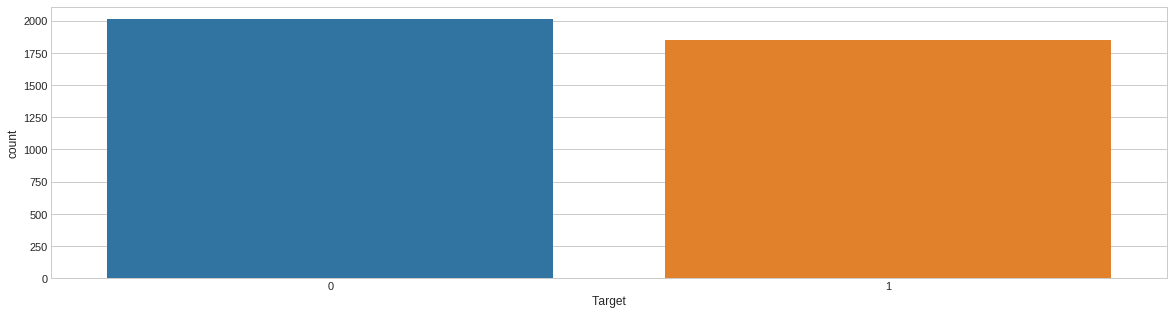

In [785]:
print("Target Attribute distribution \n")
print(df.Target.value_counts(),"\n")

fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(x= "Target",data=df,ax= ax)
plt.show()

In [827]:
per_subs=round((df[df['Target'] == 1]['Target'].value_counts()[1]/df.Target.count())*100, 2)

print("% of clients subscribed for Term Deposite -\t",per_subs)

% of clients subscribed for Term Deposite -	 11.79


### Features and Target Data Sets

In [828]:
X = df.drop(['Target','contact','poutcome'],1)
y = df['Target']

### Train and Test split on Data Set

In [829]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(31408, 14)
(13461, 14)


#### 5. Train a few standard classification algorithms, note and comment on their performances across different classification metrics. (15 marks)

### Logistic Regression Classifier

In [830]:
from sklearn.linear_model import LogisticRegression

#Initialising Logistic Regression
lr_clf=LogisticRegression()

#Fitting on data
lr_clf.fit(X_train, y_train)

#Scoring the model on train data
print("Training Accuracy :\t ", lr_clf.score(X_train, y_train))

#Scoring the model on test_data
print("Testing Accuracy :\t  ",  lr_clf.score(X_test, y_test))

y_pred = lr_clf.predict(X_test)

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Accuracy :	  0.8854113601630158
Testing Accuracy :	   0.8816581234677958


#### Confusion Matrix

In [831]:
metrics.confusion_matrix(y_pred, y_test)

array([[11557,  1317],
       [  276,   311]])

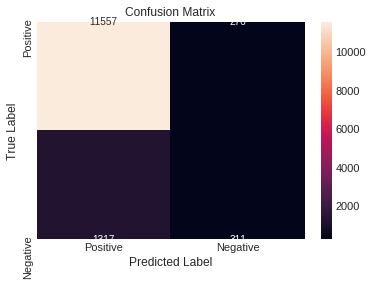

In [832]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Classification Report

In [833]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11833
           1       0.53      0.19      0.28      1628

    accuracy                           0.88     13461
   macro avg       0.71      0.58      0.61     13461
weighted avg       0.85      0.88      0.86     13461



In [834]:
y_predictProb = lr_clf.predict_proba(X_train)

fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])

roc_auc = auc(fpr, tpr)

print("auc :-",roc_auc)

auc :- 0.850309735314946


#### ROC Curve

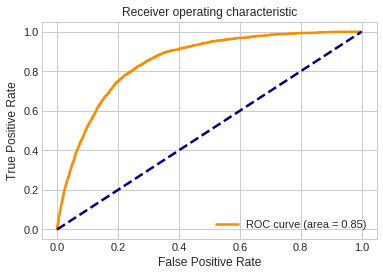

In [835]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### KNN Classifier 

In [836]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#Initialising Random Forest model
#knn_clf = KNeighborsClassifier(n_neighbors=5 , weights = 'distance' )
knn_clf = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn_clf, params_knn, cv=5)

#Fitting on data
knn_gs.fit(X_train, y_train)

#Scoring the model on train data
print("Training Accuracy :\t ", knn_gs.score(X_train, y_train))

#Scoring the model on test_data
print("Testing Accuracy :\t  ",  knn_gs.score(X_test, y_test))

#y_pred = knn_clf.predict(X_test)


Training Accuracy :	  0.8838512480896586
Testing Accuracy :	   0.8790580194636357


In [837]:
#save best model
knn_best = knn_gs.best_estimator_
#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 24}


#### Confusion Matrix

In [838]:
# Confusion matrix
knn_cm=metrics.confusion_matrix(y_test, knn_gs.predict(X_test))
knn_cm

array([[11823,    10],
       [ 1618,    10]])

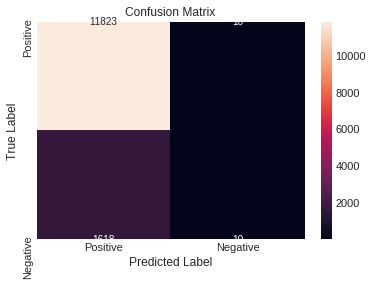

In [839]:
# Confusion Matrix
knn_cm=metrics.confusion_matrix(y_test, knn_gs.predict(X_test))

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(knn_cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [840]:
# Classification Report
print(classification_report(y_test, knn_gs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11833
           1       0.50      0.01      0.01      1628

    accuracy                           0.88     13461
   macro avg       0.69      0.50      0.47     13461
weighted avg       0.83      0.88      0.82     13461



In [841]:
y_predictProb = knn_gs.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
print("auc :-",roc_auc)

auc :- 0.7294312733867371


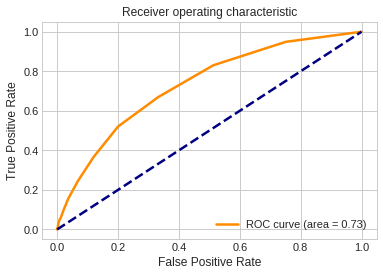

In [842]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### Basic Classifier and their accuracy

In [843]:
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()

dt.fit(X_train,y_train)
knn.fit(X_train,y_train)
lr.fit(X_train,y_train)

dt_score=dt.score(X_test,y_test)
knn_score=knn.score(X_test,y_test)
lr_score=lr.score(X_test,y_test)

print("Accuracy Score of Decision Tree -\t",dt_score )
print("Accuracy Score of KNN  -\t",knn_score )
print("Accuracy Score of Logistic Regression -\t",lr_score )
    

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score of Decision Tree -	 0.8599658272045168
Accuracy Score of KNN  -	 0.8739321001411485
Accuracy Score of Logistic Regression -	 0.8816581234677958


## Ensemble Techniques <br> 
6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees. (15 marks) <br>
### Random Forest Classifier

In [844]:
from sklearn.ensemble import RandomForestClassifier

kfold = model_selection.KFold(n_splits=10, random_state=7)
#create a new random forest classifier
#rf = RandomForestClassifier()

model = RandomForestClassifier(n_estimators=100, max_features=3)
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
#rf_gs.fit(X_train, y_train)
#rf_score=rf_gs.score(X_test,y_test)

results = model_selection.cross_val_score(model, X, y, cv=kfold)

rf_score=results.mean()


print("Accuracy Score of Random Classifier -\t",rf_score)

Accuracy Score of Random Classifier -	 0.866649232175261


#### Classification Report

In [845]:
rf_gs.fit(X_train, y_train)
y_pred=rf_gs.predict(X_test)
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11833
           1       0.61      0.30      0.40      1628

    accuracy                           0.89     13461
   macro avg       0.76      0.64      0.67     13461
weighted avg       0.87      0.89      0.87     13461



In [846]:
y_predictProb = rf_gs.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
print("auc :-",roc_auc)

auc :- 0.9040664916816357


#### ROC Curve

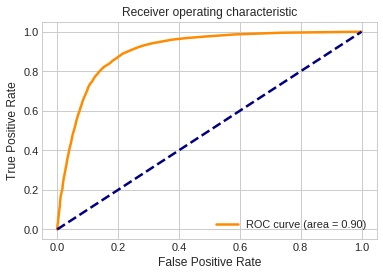

In [847]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Voting Classifier

In [848]:
from sklearn.ensemble import VotingClassifier
#model1 = LogisticRegression(random_state=1)
#model2 = DecisionTreeClassifier(random_state=1)
#model3 = LogisticRegression()
#model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('knn', model3)], voting='hard')

model = VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)), ('dt', DecisionTreeClassifier(random_state=1)),('knn', KNeighborsClassifier())], voting='hard')
model.fit(X_train,y_train)
vt_score=model.score(X_test,y_test)

print('Accuracy score of Voting Classifier -\t',vt_score)

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score of Voting Classifier -	 0.883738206671124


#### Classification Report

In [849]:
y_pred=model.predict(X_test)
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11833
           1       0.57      0.16      0.25      1628

    accuracy                           0.88     13461
   macro avg       0.73      0.57      0.59     13461
weighted avg       0.86      0.88      0.85     13461



### Bagging Decision Tree

In [850]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)

#model.fit(X_train,y_train)
#bg_clf=model.score(X_test,y_test)
#print('Accuracy score of Bagging Decision Tree Classifier -\t', bg_clf)


results = model_selection.cross_val_score(model, X, y, cv=kfold)
bg_score=results.mean()

print('Accuracy score of Bagging Decision Tree Classifier -\t', bg_score)

Accuracy score of Bagging Decision Tree Classifier -	 0.8233019380007095


#### Classification Report

In [851]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     11833
           1       0.57      0.35      0.43      1628

    accuracy                           0.89     13461
   macro avg       0.74      0.66      0.69     13461
weighted avg       0.87      0.89      0.88     13461



In [852]:
y_predictProb = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
print("auc :-",roc_auc)

auc :- 0.89640304952356


#### AUC Curve

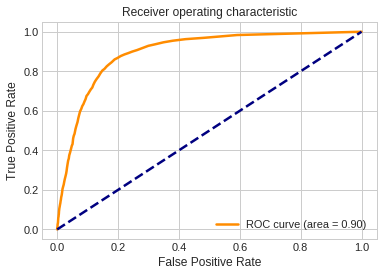

In [853]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### AdaBoost Classifier

In [854]:
from sklearn.metrics import roc_auc_score

kfold = model_selection.KFold(n_splits=10, random_state=7)

model = AdaBoostClassifier(n_estimators=30, random_state=7)

#model.fit(X_train,y_train)
#ab_clf=model.score(X_test,y_test)
#print('Accuracy score of Adaboost Classifier -\t', ab_clf)

results = model_selection.cross_val_score(model, X, y, cv=kfold)
ab_score=results.mean()

print('Accuracy score of Adaboost Classifier -\t', ab_score)


Accuracy score of Adaboost Classifier -	 0.8732684782838737


#### Classification Report

In [855]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11833
           1       0.55      0.27      0.36      1628

    accuracy                           0.88     13461
   macro avg       0.73      0.62      0.65     13461
weighted avg       0.86      0.88      0.87     13461



In [856]:
y_predictProb = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
print("auc :-",roc_auc)

auc :- 0.8763198887216465


#### ROC Curve

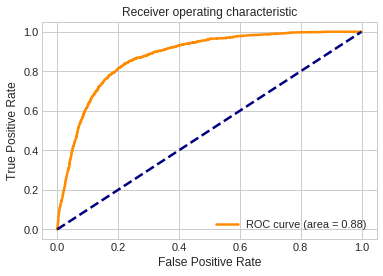

In [857]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### GradientBoost Calssifier

In [858]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gb_clf.fit(X_train, y_train)

pred_GB =gb_clf.predict(X_test)
gb_score = accuracy_score(y_test, pred_GB)

print('Accuracy score of GradientBoost Classifier -\t', gb_score)

Accuracy score of GradientBoost Classifier -	 0.8874526409627813


In [859]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11833
           1       0.55      0.27      0.36      1628

    accuracy                           0.88     13461
   macro avg       0.73      0.62      0.65     13461
weighted avg       0.86      0.88      0.87     13461



In [860]:
y_predictProb = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
print("auc :-",roc_auc)

auc :- 0.8763198887216465


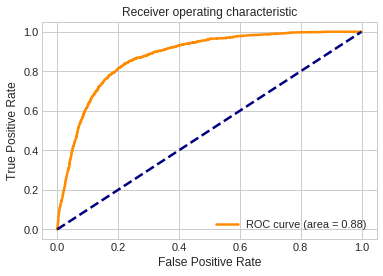

In [861]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### 7. Compare performances of all the models (5 marks)

In [862]:
models = pd.DataFrame({
    'Model': ['K Nearest Neighbors', 'Logistic Regression','Decision Tree',
              'Random Forest','Voting Classifier','Bagging Decision Tree',
              'AdaBoost Classifier','GradientBoost'],
    'Score': [knn_score, lr_score, dt_score,
              rf_score, vt_score, bg_score,
              ab_score,gb_score
              ]})
models.sort_values(by='Score', ascending=False)

Model     Score
7          GradientBoost  0.887453
4      Voting Classifier  0.883738
1    Logistic Regression  0.881658
0    K Nearest Neighbors  0.873932
6    AdaBoost Classifier  0.873268
3          Random Forest  0.866649
2          Decision Tree  0.859966
5  Bagging Decision Tree  0.823302

### For this dataset, GradientBoosting  and Voting Classifier models give the best results 

/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

Classifier : LR 	 Accuracy Score : 0.880043 	 Standard Deviation : 0.117441
Classifier : KNN 	 Accuracy Score : 0.868855 	 Standard Deviation : 0.118849


/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ratnesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ratnesh/anaconda3/lib/python3.7/si

Classifier : RF 	 Accuracy Score : 0.866515 	 Standard Deviation : 0.113580
Classifier : AB 	 Accuracy Score : 0.871575 	 Standard Deviation : 0.113165
Classifier : DT 	 Accuracy Score : 0.740730 	 Standard Deviation : 0.088870
Classifier : GB 	 Accuracy Score : 0.866649 	 Standard Deviation : 0.114906


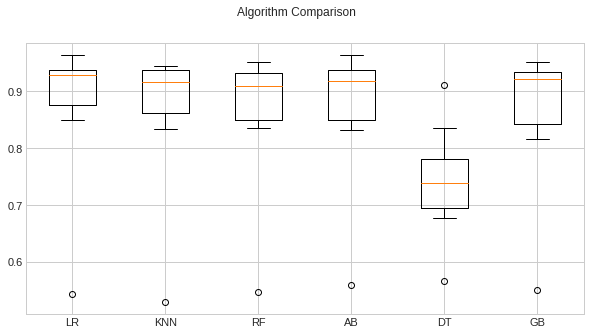

In [713]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GB', GradientBoostingClassifier()))
#models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "Classifier : %s \t Accuracy Score : %f \t Standard Deviation : %f" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    
    
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()